<a href="https://colab.research.google.com/github/sujithpeddireddy/MedEx-on-AWS/blob/main/ML_mini_project_19BCE7140.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CH Srisahith

19bce7670

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
import sklearn
%matplotlib inline


In [ ]:
df = pd.read_csv('adult.csv')
df.head(10)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
 df.shape

(48842, 15)

In [ ]:
df.dtypes


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
df['workclass'].value_counts()



Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
df['occupation'].value_counts()


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
df['native-country'].value_counts()



United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [ ]:
df['marital-status'].value_counts()


Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [ ]:
df['gender'].value_counts()


Male      32650
Female    16192
Name: gender, dtype: int64

In [ ]:
df['race'].value_counts()


White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [ ]:
df['income'].value_counts()


<=50K    37155
>50K     11687
Name: income, dtype: int64

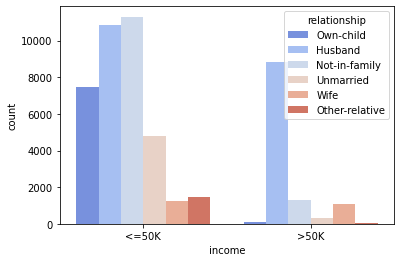

In [ ]:
sns.countplot(df['income'], palette='coolwarm', hue='relationship',data=df);


In [ ]:
df['education'].value_counts()


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Replace the values with mode

In [ ]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')  
df['native-country'] = df['native-country'].replace('?', 'United-States')


In [ ]:
df.head(8)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K


Education Category

In [ ]:

df.education = df.education.replace(['Preschool', '1st-4th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad','high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school','Some-college'], 'higher')
df.education  =  df.education.replace('Bachelors',  'undergrad')  
df.education  =  df.education.replace('Mastrers',  'grad')  
df.education = df.education.replace('Doctorate', 'doc')


Martial Status

In [ ]:

df['marital-status']  =  df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'], 'married')
df['marital-status'] = df['marital-status'].replace(['Never-married'],'not-married')
df['marital-status'] = df['marital-status'].replace(['Divorced', 'Separated','Widowed', 'Married-spouse-absent'],'others')


Income

In [ ]:

df.income  =  df.income.replace('<=50K',  0)  
df.income = df.income.replace('>50K', 1)


In [ ]:
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,school,7,not-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,high school,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,higher,10,not-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
df['marital-status'].value_counts()


married        22416
not-married    16117
others         10309
Name: marital-status, dtype: int64

In [ ]:
df['education'].value_counts()


high school    15784
higher         15374
undergrad       8025
school          5899
Masters         2657
doc              594
5th-6th          509
Name: education, dtype: int64

In [ ]:
df.corr()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


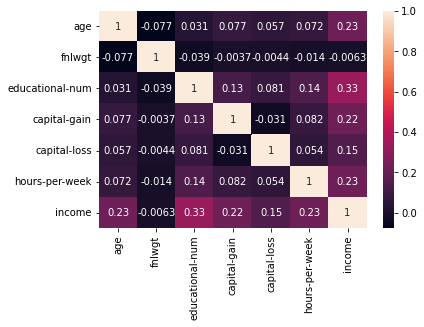

In [ ]:
sns.heatmap(df.corr(), annot=True);


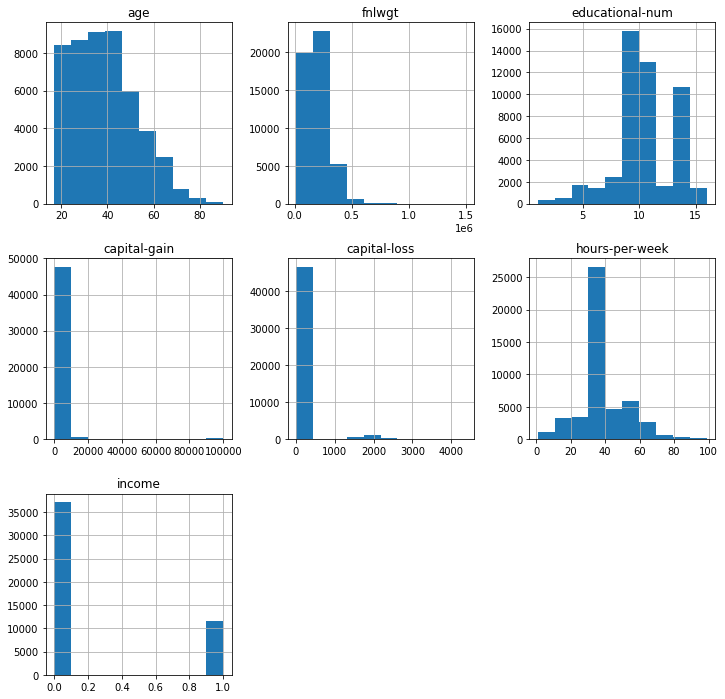

In [ ]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

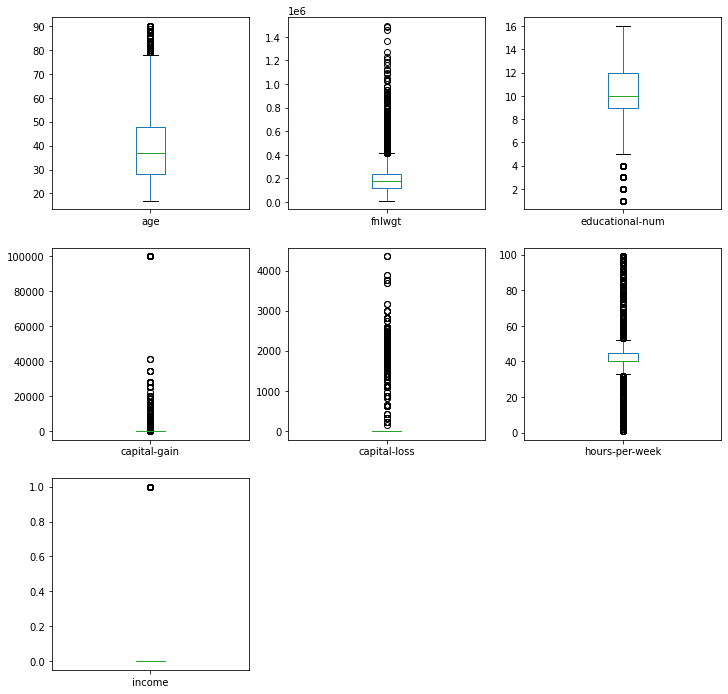

In [ ]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);


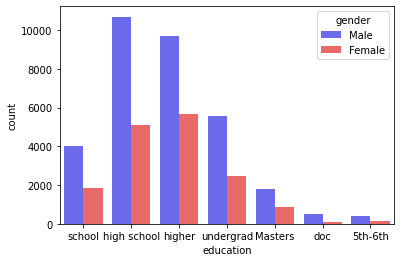

In [ ]:
sns.countplot(df['education'], hue='gender', data=df, palette='seismic');

In [ ]:
X= df.drop(['income'], axis=1)
Y= df['income']


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)  
df1.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,19329,5,6,1,6,3,2,1,0,0,39,38,0
1,21,3,4212,3,8,0,4,0,4,1,0,0,49,38,0
2,11,1,25340,4,11,0,10,0,4,1,0,0,39,38,1
3,27,3,11201,4,9,0,6,0,2,1,98,0,39,38,1
4,1,3,5411,4,9,1,9,3,4,0,0,0,29,38,0


In [ ]:
ss= StandardScaler().fit(df1.drop('income',axis=1))

In [ ]:
X= ss.transform(df1.drop('income', axis=1))
y= df['income']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=40)


Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr  =  LogisticRegression()

model = lr.fit(X_train, y_train)  
prediction  =  model.predict(X_test)  
accuracy_score(y_test,prediction)


0.8384631133556268

In [ ]:
print("ACCURACY on training data: {:,.3f}".format(lr.score(X_train,y_train)))
print("ACCURACY on test data: {:,.3f}".format(lr.score(X_test,y_test)))


ACCURACY on training data: 0.838
ACCURACY on test data: 0.838


Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rfc  =  RandomForestClassifier()

model1  =  rfc.fit(X_train,  y_train)  
prediction1 = model1.predict(X_test)

accuracy_score(y_test,prediction1)


0.8563434109056166

In [ ]:
print("ACCURACY on training data: {:,.3f}".format(rfc.score(X_train,y_train)))
print("ACCURACY on test data: {:,.3f}".format(rfc.score(X_test,y_test)))


ACCURACY on training data: 1.000
ACCURACY on test data: 0.856


Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

model2 = dtc.fit(X_train,y_train)  
prediction2 = model2.predict(X_test)  
accuracy_score(y_test,prediction2)


0.8113696853886576

In [ ]:
print("ACCURACY on training set: {:,.3f}". format(dtc.score(X_train, y_train)))
print("ACCURACY on test set: {:,.3f}". format(dtc.score(X_test, y_test)))


ACCURACY on training set: 1.000
ACCURACY on test set: 0.811


SVM

In [ ]:

from sklearn.svm import SVC

svm  =  SVC()

model3 = svm.fit(X_train,y_train)  
prediction3 = model3.predict(X_test)  
accuracy_score(y_test,prediction3)


0.8506107964239404

In [ ]:
print("ACCURACY on training set: {:,.3f}". format(svm.score(X_train,y_train)))
print("ACCURACY on test set:{:,.3f}". format(svm.score(X_test,y_test)))


ACCURACY on training set: 0.857
ACCURACY on test set:0.851
